# Railway Incidents Data - Geographical Visualizations

## This script contains the following points:
1. Importing Libraries
2. Importing Data
3. Checking Data
4. Data wrangling
5. Data cleaning
6. Plotting a choropleth

# 1. Importing Libraries


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
from folium import plugins
import json

In [2]:
%matplotlib inline

# 2. Importing Data


In [3]:
# Project folder path
path=r'C:\Users\maryn\Documents\Data Projects\Railway Incidents Data'

In [4]:
# Import dataset RID_clean_1.csv
df_RID = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'RID_clean_1.csv'), index_col = False)

In [5]:
# Import ".json" file for the U.S. 
country_geo = r'C:\Users\maryn\Documents\Data Projects\Railway Incidents Data\02 Data\Original Data\us-states.json'

# 3. Checking Data

In [6]:
df_RID.head()

,Unnamed: 0,reporting_railroad_code,railroad_name,year,accident_id,month,accident_type,state,fra_district,train_speed,temperature,visibility,weather_condition,has_passengers,damage_cost,persons_killed,persons_injured
0,0,NICD,Northern Indiana Commuter Transportation District,2017,N1700013,6,Derailment,ILLINOIS,4,10.0,65.0,Day,Clear,Yes,0.0,0.0,0.0
1,1,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,2017,201707188,6,Derailment,ILLINOIS,4,0.0,65.0,Day,Clear,Unknown,0.0,0.0,0.0
2,2,CR,Conrail,1981,0420001,4,Side collision,NEW YORK,1,0.0,28.0,Day,Snow,No,0.0,0.0,0.0
3,3,IC,Illinois Central Railroad Company,2007,543854,1,Derailment,LOUISIANA,5,4.0,56.0,Day,Cloudy,No,0.0,0.0,0.0
4,4,IC,Illinois Central Railroad Company,2017,938223,10,Hwy-rail crossing,ILLINOIS,4,0.0,66.0,Dark,Clear,No,0.0,0.0,1.0


In [7]:
# Drop the 'Unnamed: 0' column
df_RID.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df_RID.head()

,reporting_railroad_code,railroad_name,year,accident_id,month,accident_type,state,fra_district,train_speed,temperature,visibility,weather_condition,has_passengers,damage_cost,persons_killed,persons_injured
0,NICD,Northern Indiana Commuter Transportation District,2017,N1700013,6,Derailment,ILLINOIS,4,10.0,65.0,Day,Clear,Yes,0.0,0.0,0.0
1,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,2017,201707188,6,Derailment,ILLINOIS,4,0.0,65.0,Day,Clear,Unknown,0.0,0.0,0.0
2,CR,Conrail,1981,0420001,4,Side collision,NEW YORK,1,0.0,28.0,Day,Snow,No,0.0,0.0,0.0
3,IC,Illinois Central Railroad Company,2007,543854,1,Derailment,LOUISIANA,5,4.0,56.0,Day,Cloudy,No,0.0,0.0,0.0
4,IC,Illinois Central Railroad Company,2017,938223,10,Hwy-rail crossing,ILLINOIS,4,0.0,66.0,Dark,Clear,No,0.0,0.0,1.0


In [9]:
# Check the data types of columns
df_RID.dtypes

reporting_railroad_code     object
railroad_name               object
year                         int64
accident_id                 object
month                        int64
accident_type               object
state                       object
fra_district                 int64
train_speed                float64
temperature                float64
visibility                  object
weather_condition           object
has_passengers              object
damage_cost                float64
persons_killed             float64
persons_injured            float64
dtype: object

In [10]:
df_RID.shape

(210666, 16)

# 4. Data Wrangling

In [11]:
df_RID['state'].value_counts(dropna = False)

state
ILLINOIS                20466
TEXAS                   20423
CALIFORNIA              10773
PENNSYLVANIA             9294
OHIO                     8432
IOWA                     7193
NEW YORK                 6902
MINNESOTA                6550
MISSOURI                 6434
INDIANA                  6216
NEBRASKA                 5915
KANSAS                   5728
GEORGIA                  5629
LOUISIANA                5559
TENNESSEE                5019
WISCONSIN                4661
ALABAMA                  4473
WASHINGTON               4457
MICHIGAN                 4411
KENTUCKY                 4408
ARKANSAS                 4232
OKLAHOMA                 3652
VIRGINIA                 3588
FLORIDA                  3499
NEW JERSEY               3109
MISSISSIPPI              3095
OREGON                   3048
COLORADO                 3036
WYOMING                  2809
NORTH CAROLINA           2775
WEST VIRGINIA            2743
MONTANA                  2623
MARYLAND                 2254
NORT

In [12]:
df_RID['state'] = df_RID['state'].str.title()

In [15]:
df_RID['state'].value_counts(dropna = False)

state
Illinois                20466
Texas                   20423
California              10773
Pennsylvania             9294
Ohio                     8432
Iowa                     7193
New York                 6902
Minnesota                6550
Missouri                 6434
Indiana                  6216
Nebraska                 5915
Kansas                   5728
Georgia                  5629
Louisiana                5559
Tennessee                5019
Wisconsin                4661
Alabama                  4473
Washington               4457
Michigan                 4411
Kentucky                 4408
Arkansas                 4232
Oklahoma                 3652
Virginia                 3588
Florida                  3499
New Jersey               3109
Mississippi              3095
Oregon                   3048
Colorado                 3036
Wyoming                  2809
North Carolina           2775
West Virginia            2743
Montana                  2623
Maryland                 2254
Nort

In [16]:
# Create a subset
columns = ['year', 'month', 'accident_type', 'state', 'train_speed', 'temperature', 'damage_cost',	'persons_killed', 'persons_injured']
df_sub = df_RID[columns]

In [17]:
df_sub.head()

,year,month,accident_type,state,train_speed,temperature,damage_cost,persons_killed,persons_injured
0,2017,6,Derailment,Illinois,10.0,65.0,0.0,0.0,0.0
1,2017,6,Derailment,Illinois,0.0,65.0,0.0,0.0,0.0
2,1981,4,Side collision,New York,0.0,28.0,0.0,0.0,0.0
3,2007,1,Derailment,Louisiana,4.0,56.0,0.0,0.0,0.0
4,2017,10,Hwy-rail crossing,Illinois,0.0,66.0,0.0,0.0,1.0


# 5. Data cleaning

In [18]:
# Check for missing values
df_sub.isnull().sum()

year               0
month              0
accident_type      0
state              0
train_speed        0
temperature        0
damage_cost        0
persons_killed     0
persons_injured    0
dtype: int64

In [19]:
dups = df_sub.duplicated()

In [20]:
dups.shape

(210666,)

# 6. Plotting a choropleth

In [21]:
# Create a data frame with just the states and the values for rating we want plotted
data_to_plot = df_sub[['state','train_speed']]
data_to_plot.head()

,state,train_speed
0,Illinois,10.0
1,Illinois,0.0
2,New York,0.0
3,Louisiana,4.0
4,Illinois,0.0


In [22]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state','train_speed'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = 'Train speed').add_to(map)
folium.LayerControl().add_to(map)

map

### The plot shows that train speeds at the time of train accidents vary widely across the United States, with the highest speeds observed in Michigan and some Northwestern states. In contrast, accident train speeds are generally lower in the Southwestern and Midwestern states. 

In [23]:
# Save the map
map.save('choropleth_map_train_speed.html')

C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


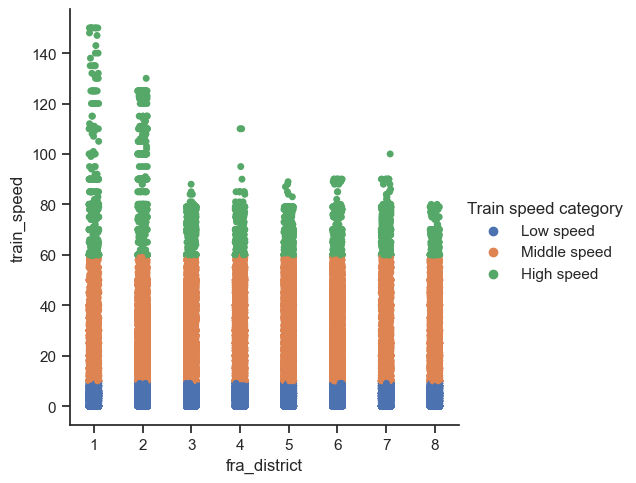

In [35]:
# Create a categorical plot in seaborn for variables 'fra_district' and 'train_speed'
sns.set(style="ticks")
g = sns.catplot(x="fra_district", y="train_speed", hue="Train speed category", data=df_RID_numeric)